# New Customer Data
Below is the analysis of the New Customer data. The analysis includes reviewing the data to clean and making necessary changes to increase reliability for analysis

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/kpmg-virtualinternship/KPMG (1).xlsx


In [5]:
RawData= pd.ExcelFile("/kaggle/input/kpmg-virtualinternship/KPMG (1).xlsx")

In [6]:
NewCustomerList = pd.read_excel(RawData, 'NewCustomerList')

In [7]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

**5 columns are unnamed and can be dropped**

In [8]:
NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [9]:
#Checking for null values
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

**4 columns are missing values. Depending on Analysis requirements they can be amended or dropped**

In [10]:
#Checking for duplicate values
NewCustomerList.duplicated().sum()

0

In [11]:
#Checking for uniquness of each column
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

Deceased_indicator and Country only have 1 answer and can be implied but for the sake of the analysis we can show the results

In [43]:
NewCustomerList['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

In [12]:
NewCustomerList['country'].value_counts()

Australia    1000
Name: country, dtype: int64

In [13]:
NewCustomerList['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [14]:
NewCustomerList['past_3_years_bike_related_purchases'].sum()

49836

In [15]:
NewCustomerList['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [16]:
NewCustomerList['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [17]:
NewCustomerList['tenure'].value_counts().sort_index()

0      2
1      8
2     15
3     26
4     36
5     60
6     45
7     60
8     55
9     79
10    63
11    68
12    61
13    74
14    54
15    58
16    49
17    59
18    36
19    34
20    22
21    24
22    12
Name: tenure, dtype: int64

We can group them into 0-6 months. 6-12, 12-18 and 18-24 months

In [18]:
NewCustomerList['tenure_group'] =np.where(NewCustomerList['tenure'] <6.0, "0-6 Months", 
                                np.where((NewCustomerList['tenure'] >6.0) & (NewCustomerList['tenure']<12.0), "6-12 Months", 
                                        np.where((NewCustomerList['tenure'] > 12.0) & (NewCustomerList['tenure'] <18.0), "12-18 Months",
                                                "18-24 Months")))

In [19]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,tenure_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,12-18 Months
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,12-18 Months
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,6-12 Months
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,0-6 Months
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,18-24 Months


In [20]:
NewCustomerList['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

# Graphical Representation

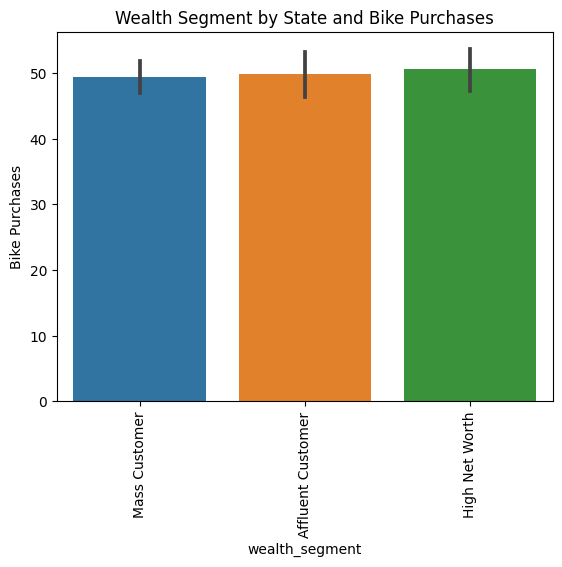

In [21]:
# Plot line graph of wealth segment by state and bike purchases
sns.barplot(x='wealth_segment', y='past_3_years_bike_related_purchases', data=NewCustomerList)

# Set the plot title and axis labels
plt.title('Wealth Segment by State and Bike Purchases')
plt.xlabel('wealth_segment')
plt.ylabel('Bike Purchases')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()

Relativity plot 

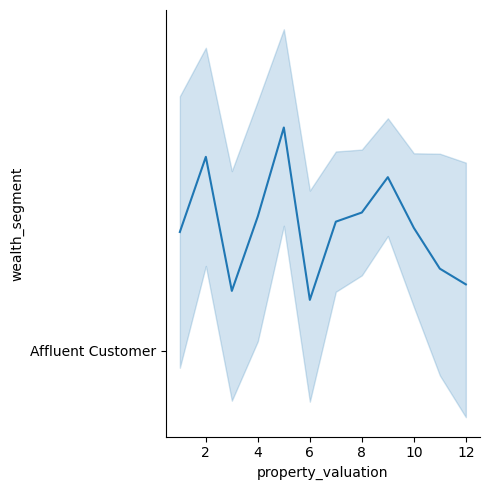

In [22]:
sns.relplot(x='property_valuation', y='wealth_segment', data=NewCustomerList, kind="line")

<AxesSubplot: xlabel='past_3_years_bike_related_purchases', ylabel='gender'>

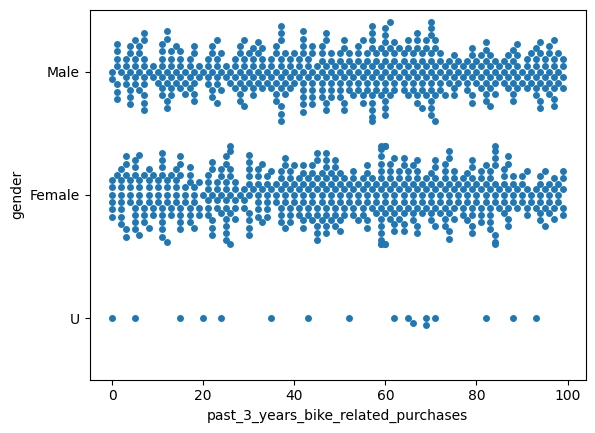

In [31]:
sns.swarmplot(y = NewCustomerList['gender'], x = NewCustomerList['past_3_years_bike_related_purchases'])